In [1]:
import sys
import numpy as np
import pandas as pd
import os

sys.path.append("..")
import rbf_functions

In [53]:
rbfs = [
    rbf_functions.original_rbf,
    # rbf_functions.squared_exponential_rbf,
    # rbf_functions.inverse_quadratic_rbf,
    # rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    # rbf_functions.matern32_rbf,
    # rbf_functions.matern52_rbf,
]

In [3]:
output_dir = os.path.abspath("../notebooks/refsets/")
name = "original_rbf"
filename = f"{name}_refset_variables.csv"
filename2 = f"{name}_refset.csv"
df_dvars = pd.read_csv(f"{output_dir}/{filename}", header=None)
df_refset = pd.read_csv(f"{output_dir}/{filename2}")

In [4]:
df_dvars

,0,1,2,3,4,5,6,7,8
0,-0.498973,0.238823,0.909643,0.239942,-0.009986,0.146846,0.328132,0.659522,0.551938
1,0.330341,0.098610,0.999990,0.656165,0.619252,0.837444,0.209629,0.812619,0.545341
2,0.346533,0.021798,0.999918,0.419155,-0.051124,0.146840,0.081991,0.589967,0.525728
3,-0.875231,0.480229,0.999955,0.684035,0.925276,0.751885,0.099640,0.896824,0.562452
4,-0.556734,0.309077,0.994260,0.336825,0.987032,0.882949,0.320131,0.793960,0.087322
5,-0.824906,0.361192,0.999676,0.233271,0.999572,0.914203,0.054765,0.590291,0.091071
6,0.938439,0.980874,0.991735,0.988282,0.993923,0.867756,0.198453,0.809443,0.608648
7,0.123221,0.139089,0.998484,0.974439,0.996849,0.764399,0.905804,0.058152,0.995716
8,0.747252,0.393789,0.746272,0.885745,0.691580,0.618260,0.204321,0.878701,0.841281
9,0.873663,0.220049,0.997203,0.970304,0.872546,0.056786,0.689954,0.201840,0.584769


In [5]:
columnname = ["c1", "r1", "c2", "r2", "c3", "r3", "w1", "w2", "w3"]
df_dvars.columns = columnname
df_dvars.describe()

,c1,r1,c2,r2,c3,r3,w1,w2,w3
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.207385,0.306101,0.895332,0.635241,0.480549,0.403007,0.468208,0.541168,0.473226
std,0.609543,0.288270,0.359480,0.250805,0.476922,0.358609,0.311938,0.313573,0.303495
min,-0.875231,0.016969,-0.645706,0.233271,-0.294757,0.036139,0.054765,0.058152,0.007800
25%,-0.073526,0.123197,0.994260,0.419155,-0.009986,0.109963,0.198453,0.205649,0.091071
50%,0.111413,0.220049,0.999635,0.656165,0.619252,0.246066,0.434532,0.590291,0.551938
75%,0.873663,0.373607,0.999955,0.885745,0.935788,0.764399,0.718914,0.809443,0.608648
max,0.997713,0.980874,0.999998,0.997327,0.999572,0.995400,0.974013,0.985939,0.995716


In [6]:
# setup the RBF network
n_inputs = 1  # (time, storage of Conowingo)
n_outputs = 1  # Atomic, Baltimore, Chester, Downstream:- (hydropower, environmental)
n_rbfs = n_inputs + 1

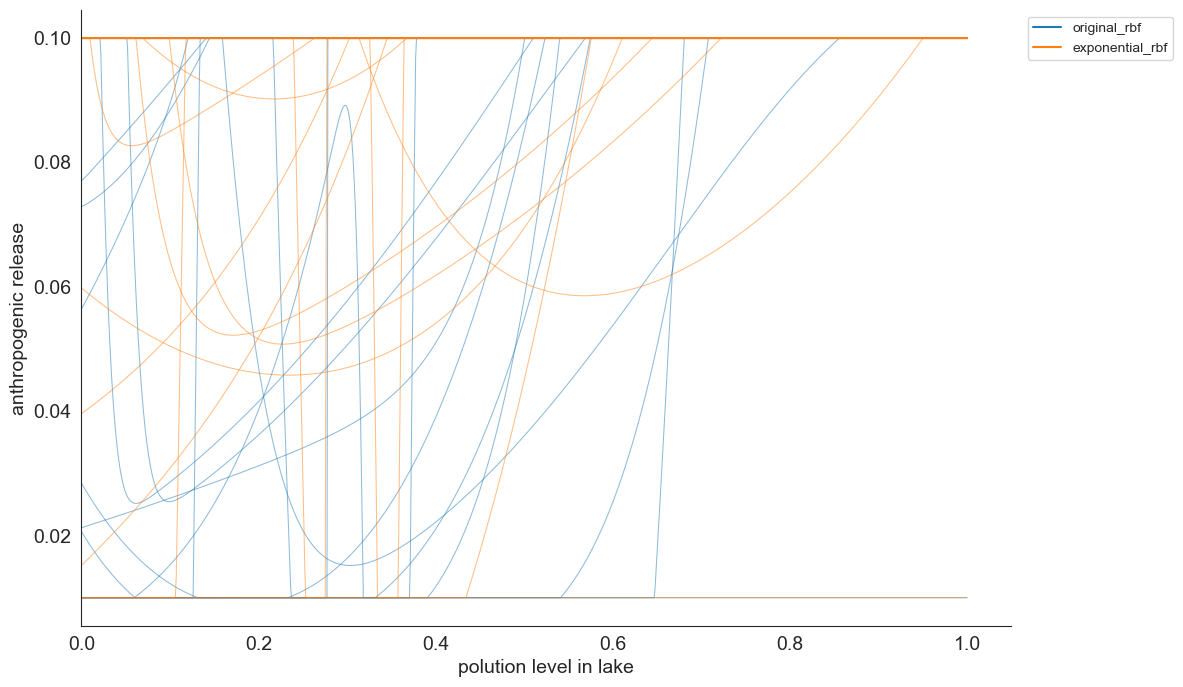

In [54]:
from matplotlib.lines import Line2D
sns.set_style("white")

x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()

for entry, c in zip(rbfs, sns.color_palette()):
    rbf = rbf_functions.RBF(n_rbfs, n_inputs, n_outputs, rbf_function=entry)
    y = []
    for _, row in df_dvars.iterrows():
        rbf.set_decision_vars(row.values)
        yi = [
            min(
                max(
                    rbf.apply_rbfs(
                        np.asarray(
                            [
                                xi,
                            ]
                        )
                    )[0],
                    0.01,
                ),
                0.1,
            )
            for xi in x
        ]
        y.append(yi)


    ax.plot(x, np.asarray(y).T, c=c, alpha=.5, lw=0.75)

sns.despine()
ax.set_xlabel("polution level in lake")
ax.set_ylabel("anthropogenic release")
ax.set_xlim(xmin=0)

change_fontsize(fig)

lines, labels = zip(*[(Line2D([0, 1], [0, 0], c=c), entry.__name__) for entry, c in zip(rbfs, sns.color_palette())])
ax.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.01, 1))
# save_fig(fig, "../figs", "shallow_lake_decisionrule")

plt.show()

In [51]:
save_fig?

Signature: save_fig(fig, dir, name, dpi=300)
Docstring:
save a high res and a low res version of the figure in the specified
directory, using the label i.

Parameters
----------
fig : a Figure instance
dir : str
      the directory where figures are to be saved
name : str
dpi : int, optional
File:      ~/Documents/GitHub/scratchpad/kernel_config.py
Type:      function